In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
def loadLinks(path):
    d = {}
    with open(path) as f:
        for l in f:
            w = l.split()
            d[w[0]] = w[1:]
    return d

In [35]:
data = np.loadtxt("./recodata/u.data", int)[:,:3]
links = nx.from_dict_of_lists(loadLinks("./recodata/u.links"),create_using=nx.DiGraph())

/opt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

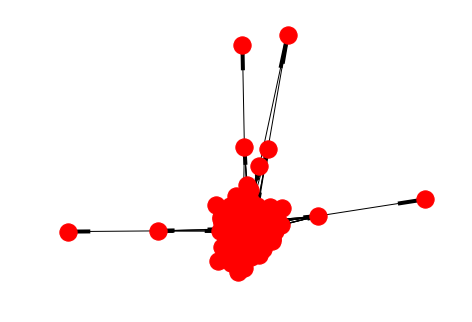

In [36]:
nx.draw(links)
plt.show()

In [123]:
def colFil(r, k, ite = 1000, alpha = 0.5, eps = 1e-3):
    du, dv, _ = r.max(0)
    u = np.random.rand(du, k)
    v = np.random.rand(dv, k)
    for i in range(ite):
        for ui, nu in enumerate(u):
            for vi, nv in enumerate(v):
                if ((r[:,0] == ui) & (r[:,1] == vi)).any():
                    print(r[ (r[:,0] == ui) & (r[:,1] == vi)])
                    loss =  alpha * (r[ (r[:,0] == ui) & (r[:,1] == vi)][0,2] - nu.dot(nv)) * (r[ui,vi] - nu.dot(nv))\
                    + (1 - alpha) * (nu*nu) * (nv*nv)
                    print(loss)

In [124]:
colFil(data, 10, 10)

[[1 1 5]]
[ 333.40124807  333.35628266  333.4027438   333.35063609  333.4109654
  333.35394363  333.41934204  333.37826355  333.63117365  333.36778352]
[[1 2 3]]
[ 0.81226114  0.68238927  0.66917705  0.68806931  0.67966556  0.66763412
  0.69871219  0.68496529  0.67783881  0.67755668]
[[1 3 4]]


IndexError: index 3 is out of bounds for axis 1 with size 3

In [95]:
data[:,1] == 10

array([False, False, False, ..., False, False, False], dtype=bool)

In [79]:
u = np.random.rand(5, 10)

In [118]:
r = data
(r[:,0] == 10) & (r[:,1] == 20)

array([False, False, False, ..., False, False, False], dtype=bool)

Faire pareil que colFil mais avec une contrainte suplémentaire : minimiser les distance entre certain vecteur de U et une autre matrice Z avec les lien entre l'utilisateur i et j (potentiellement dirigé) t. q. (Ui-Zj)^2 -> 0 